<a href="https://colab.research.google.com/github/Furkan-Coskun/NLP/blob/master/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data Wrangling

In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.Rating.value_counts(dropna=False)

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df["Recommended IND"].value_counts(dropna=False)

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [ ]:
df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})

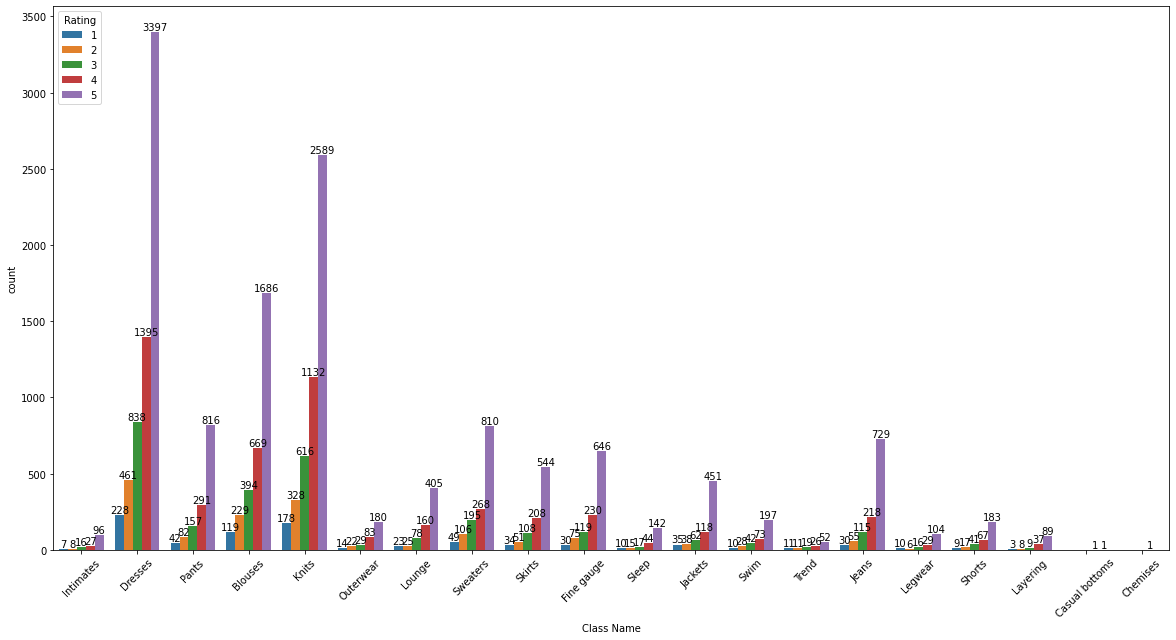

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(data = df, x ="Class Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

<AxesSubplot:xlabel='Rating', ylabel='Recommended IND'>

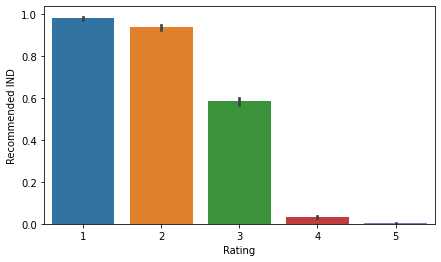

In [ ]:
sns.barplot(data = df, x = "Rating", y = "Recommended IND")


In [ ]:
df[["Review Text","Recommended IND"]]

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
23481,I was very happy to snag this dress at such a ...,0
23482,"It reminds me of maternity clothes. soft, stre...",0
23483,"This fit well, but the top was very see throug...",1
23484,I bought this dress for a wedding i have this ...,0


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df.rename(columns={'Review Text': 'text', 'Recommended IND': 'score'}, inplace=True)

In [ ]:
df["text"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                        

### Missing Value Detection

In [ ]:
df[df["text"].isna()]

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,score,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,0,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,0,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,0,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,0,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,0,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...,...
23258,23258,862,35,NaN,NaN,4,0,0,General,Tops,Knits
23301,23301,862,52,NaN,NaN,5,0,0,General,Tops,Knits
23303,23303,823,46,NaN,NaN,5,0,0,General,Tops,Blouses
23470,23470,1104,39,NaN,NaN,5,0,0,General Petite,Dresses,Dresses


In [ ]:
df[df["text"].isna()]["Rating"].value_counts()

5    591
4    169
3     48
1     21
2     16
Name: Rating, dtype: int64

In [ ]:
df[df["text"].isna()]["score"].value_counts()

0    774
1     71
Name: score, dtype: int64

In [ ]:
df.drop(index = df[df["text"].isna()].index, inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    19675 non-null  object
 4   text                     22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   score                    22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


In [ ]:
df = df[["text","score"]]

In [ ]:
df

,text,score
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
22636,I was very happy to snag this dress at such a ...,0
22637,"It reminds me of maternity clothes. soft, stre...",0
22638,"This fit well, but the top was very see throug...",1
22639,I bought this dress for a wedding i have this ...,0


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
df.text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: text, Length: 22641, dtype: object

In [ ]:
negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
                            "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
                            'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn',
                            "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words = stopwords.words('english')


In [ ]:
for i in negative_auxiliary_verbs:
       if i in stop_words:
            stop_words.remove(i)
        

In [ ]:
list(stop_words)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def cleaning(data):
    
         
    #1. Tokenize and lower
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #5. joining
    return " ".join(text_cleaned)

In [ ]:
df.text.apply(cleaning)

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22638    fit well top see never would worked glad able ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 22641, dtype: object

In [ ]:
cleaning_text = df["text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [ ]:
from wordcloud import WordCloud

In [ ]:
positive_text = df[df["score"] == 0]["text"]
positive_text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
22635    So i wasn't sure about ordering this skirt bec...
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: text, Length: 18540, dtype: object

In [ ]:
negative_text = df[df["score"] == 1]["text"]
negative_text

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
22606    I tried these on because the color is really p...
22607    I wanted to love this jacket. so soft and grea...
22617    I purchased this for a very good price and i t...
22634    I was surprised at the positive reviews for th...
22638    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_text = df[df["score"] == 0]["text"].apply(cleaning)

In [ ]:
negative_text = df[df["score"] == 1]["text"].apply(cleaning)

In [ ]:
positive_reviews = positive_text
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    sure ordering skirt could see person first gla...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [ ]:
positive_words = " ".join(positive_reviews)

In [ ]:
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

In [ ]:
negative_reviews = negative_text
negative_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper would p...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun want pair pant l...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked glad able ...
Name: text, Length: 4101, dtype: object

In [ ]:
negative_words = " ".join(negative_reviews)

In [ ]:
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
#!pip install wordcloud

In [ ]:
worldcloud_pos = WordCloud(background_color="white", max_words =250)

In [ ]:
worldcloud_pos.generate(positive_words)


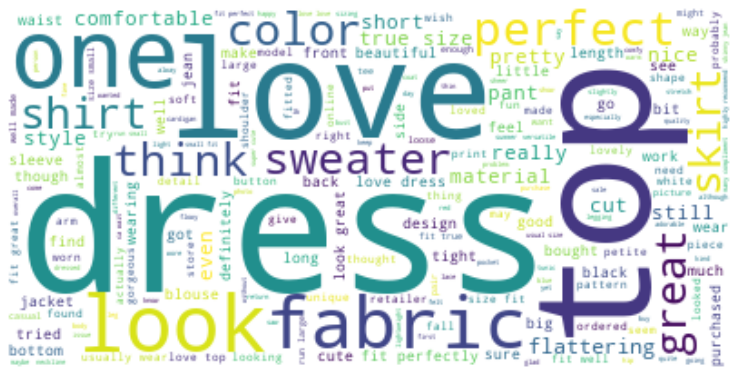

In [ ]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
worldcloud_neg = WordCloud(background_color="white", max_words =250)
worldcloud_neg.generate(negative_words)

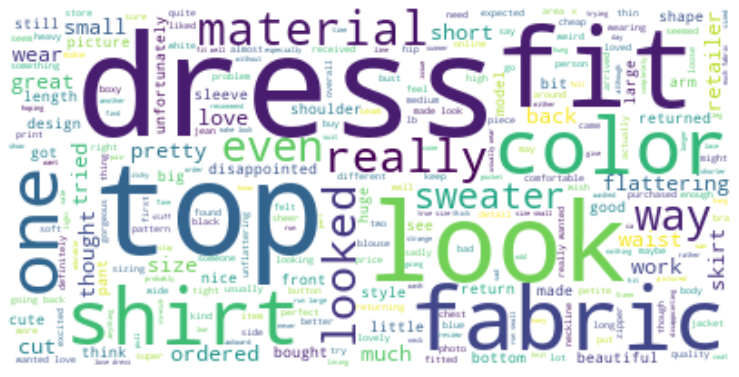

In [ ]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["text"]
y = df["score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.2929211],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292921
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.26487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn. model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import average_precision_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [1]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [1])}

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3595  114]
 [ 417  403]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3709
           1       0.78      0.49      0.60       820

    accuracy                           0.88      4529
   macro avg       0.84      0.73      0.77      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     14831
           1       0.81      0.49      0.61      3281

    accuracy                           0.89     18112
   macro avg       0.85      0.73      0.77     18112
weighted avg       0.88      0.89      0.88     18112



In [ ]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.872736
train_accuracy         0.885791
test_precision-neg     0.756565
train_precision-neg    0.808289
test_recall-neg        0.439192
train_recall-neg       0.484439
test_f1-neg            0.555447
train_f1-neg           0.605795
dtype: float64

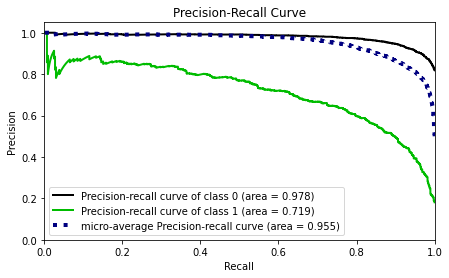

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba[:, 1]

array([0.50014285, 0.44599554, 0.20799826, ..., 0.11552437, 0.2367987 ,
       0.26504878])

In [ ]:
y_test

15070    1
16897    0
14250    0
19658    0
11139    1
        ..
13891    1
10843    0
8560     0
3245     0
4614     0
Name: score, Length: 4529, dtype: int64

In [ ]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
log_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3614   95]
 [ 449  371]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3709
           1       0.80      0.45      0.58       820

    accuracy                           0.88      4529
   macro avg       0.84      0.71      0.75      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     14831
           1       0.85      0.47      0.61      3281

    accuracy                           0.89     18112
   macro avg       0.87      0.73      0.77     18112
weighted avg       0.89      0.89      0.88     18112



In [ ]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.875773
train_accuracy         0.888349
test_precision-neg     0.814876
train_precision-neg    0.857179
test_recall-neg        0.407498
train_recall-neg       0.460361
test_f1-neg            0.543046
train_f1-neg           0.599010
dtype: float64

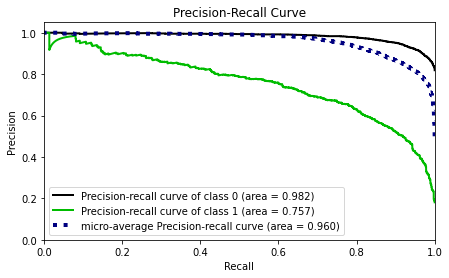

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.4, max_iter=1000)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_AP = average_precision_score(y_test, y_pred_proba[:, 1])

## Naive Bayes 

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = BernoulliNB ()
nb.fit(X_train_count,y_train)

BernoulliNB()

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3377  332]
 [ 221  599]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.68      0.80      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



In [ ]:
model = BernoulliNB()
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.874448
train_accuracy         0.897668
test_precision-neg     0.633689
train_precision-neg    0.688985
test_recall-neg        0.728736
train_recall-neg       0.793153
test_f1-neg            0.677682
train_f1-neg           0.737403
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "alpha": [1.0, 1.5, 5.0, 10.0]
}
grid_search = GridSearchCV(BernoulliNB (), param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.5, 5.0, 10.0]}, verbose=2)

In [ ]:
grid_search.best_params_


{'alpha': 1.0}

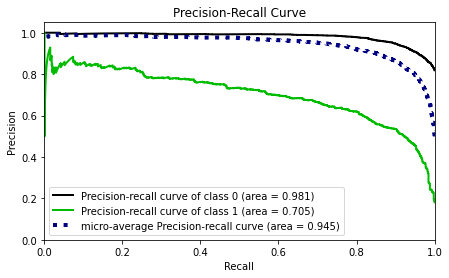

In [ ]:
model = BernoulliNB()

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [ ]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3377  332]
 [ 221  599]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.68      0.80      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.02)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.02)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3548  161]
 [ 333  487]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3709
           1       0.75      0.59      0.66       820

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.88      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14831
           1       0.86      0.69      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.90      0.83      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [ ]:
model = LinearSVC(C=0.02)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.887036
train_accuracy         0.924973
test_precision-neg     0.742129
train_precision-neg    0.863390
test_recall-neg        0.577872
train_recall-neg       0.695960
test_f1-neg            0.649551
train_f1-neg           0.770680
dtype: float64

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 1],
              'class_weight': ["balanced", None]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 1],
                         'class_weight': ['balanced', None]},
             verbose=2)

In [ ]:
grid_search.best_params_


{'C': 0.02, 'class_weight': None}

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.02)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

In [ ]:
decision_function

array([ 0.60195181,  0.04927756, -0.78269113, ..., -0.78702753,
        0.02127265, -0.62124121])

In [ ]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
svc_AP_neg = average_precision_score(y_test, decision_function)

### TD-IDF

In [ ]:
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)

LinearSVC()

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3505  204]
 [ 313  507]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3709
           1       0.71      0.62      0.66       820

    accuracy                           0.89      4529
   macro avg       0.82      0.78      0.80      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14831
           1       0.89      0.79      0.84      3281

    accuracy                           0.95     18112
   macro avg       0.92      0.89      0.90     18112
weighted avg       0.94      0.95      0.94     18112



In [ ]:
model = LinearSVC()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.886594
train_accuracy         0.947585
test_precision-neg     0.725391
train_precision-neg    0.898492
test_recall-neg        0.602564
train_recall-neg       0.801178
test_f1-neg            0.658169
train_f1-neg           0.847045
dtype: float64

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.02, 0.05, 0.1, 1, 10],
              'class_weight': ["balanced", None]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_tf_idf, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.02, 0.05, 0.1, 1, 10],
                         'class_weight': ['balanced', None]},
             verbose=2)

In [ ]:
grid_search.best_params_


{'C': 1, 'class_weight': None}

In [ ]:
model = LinearSVC()

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_AP_neg = average_precision_score(y_test, decision_function)

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 30, random_state = 42, class_weight="balanced",n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3459  250]
 [ 286  534]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3709
           1       0.68      0.65      0.67       820

    accuracy                           0.88      4529
   macro avg       0.80      0.79      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14831
           1       0.89      0.96      0.92      3281

    accuracy                           0.97     18112
   macro avg       0.94      0.96      0.95     18112
weighted avg       0.97      0.97      0.97     18112



In [ ]:
model = RandomForestClassifier(100, max_depth = 30, random_state = 42, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring =  scoring, cv = 10, return_train_score=True, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.875386
train_accuracy         0.970480
test_precision-neg     0.672084
train_precision-neg    0.884384
test_recall-neg        0.611398
train_recall-neg       0.963087
test_f1-neg            0.640008
train_f1-neg           0.922019
dtype: float64

In [ ]:
param_grid = {"n_estimators":[10,50,75,100],
              "max_depth": [10,30,50]}
grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50, 75, 100],
                         'n_estimators': [10, 20, 30, 50, 75, 100]},
             verbose=2)

In [ ]:
grid_search.best_params_


{'max_depth': 30, 'n_estimators': 100}

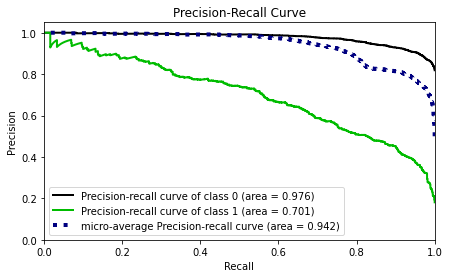

In [ ]:
model = RandomForestClassifier(100, max_depth = 30, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [ ]:
rf = RandomForestClassifier(100, max_depth=30, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3444  265]
 [ 301  519]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3709
           1       0.66      0.63      0.65       820

    accuracy                           0.88      4529
   macro avg       0.79      0.78      0.79      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14831
           1       0.89      0.97      0.93      3281

    accuracy                           0.97     18112
   macro avg       0.94      0.97      0.96     18112
weighted avg       0.97      0.97      0.97     18112



In [ ]:
model = RandomForestClassifier(100, max_depth=30, random_state = 42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.870694
train_accuracy         0.975903
test_precision-neg     0.660225
train_precision-neg    0.900369
test_recall-neg        0.590371
train_recall-neg       0.974906
test_f1-neg            0.623049
train_f1-neg           0.936142
dtype: float64

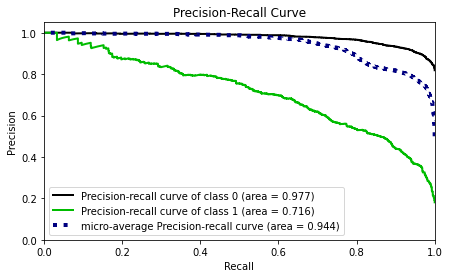

In [ ]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 400, learning_rate=0.5, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3500  209]
 [ 345  475]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.69      0.58      0.63       820

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14831
           1       0.78      0.64      0.70      3281

    accuracy                           0.90     18112
   macro avg       0.85      0.80      0.82     18112
weighted avg       0.90      0.90      0.90     18112



In [ ]:
model = AdaBoostClassifier(n_estimators=400,learning_rate=0.5, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.879914
train_accuracy         0.893864
test_precision-neg     0.753564
train_precision-neg    0.806532
test_recall-neg        0.501680
train_recall-neg       0.544787
test_f1-neg            0.602008
train_f1-neg           0.650305
dtype: float64

In [ ]:
param_grid = {"n_estimators": [100, 250, 400, 500, 600], "learning_rate": [0.01, 0.1, 0.5, 1.0, 1.5]}
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [100, 250, 400, 500, 600]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 400}

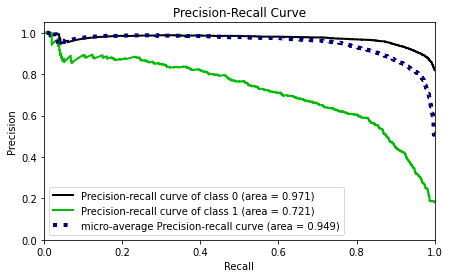

In [ ]:
model = AdaBoostClassifier(n_estimators= 400,learning_rate=0.5, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=400,learning_rate=0.5, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3564  145]
 [ 401  419]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3709
           1       0.74      0.51      0.61       820

    accuracy                           0.88      4529
   macro avg       0.82      0.74      0.77      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14831
           1       0.82      0.60      0.69      3281

    accuracy                           0.90     18112
   macro avg       0.87      0.78      0.82     18112
weighted avg       0.90      0.90      0.90     18112



In [ ]:
model = AdaBoostClassifier(n_estimators=400,learning_rate=0.5 , random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.879914
train_accuracy         0.905403
test_precision-neg     0.745832
train_precision-neg    0.831556
test_recall-neg        0.512653
train_recall-neg       0.599174
test_f1-neg            0.607410
train_f1-neg           0.696482
dtype: float64

In [ ]:
param_grid = {"n_estimators": [100, 250, 400, 500, ], "learning_rate": [ 0.1, 0.5, 1.0, 1.5]}
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_tf_idf, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [100, 250, 400, 500]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 400}

In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

## BERT Modeling

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___